## Notebook #3: Final Modeling and Metrics

In this notebook, I will finalize the model I finished with in Notebook #2. This is by far my best performing model and the model off which I base my Kaggle submissions. 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [44]:
df_house = pd.read_csv('./datasets/train.csv')
pd.set_option('display.max_columns', None)
df_house.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


At first glance and from what I know about homes and home buying, I'm seeing a ton of really great features that could potentially be great predictors as well. Let's dig in.

In [45]:
df_house.columns = df_house.columns.str.lower().str.replace(' ', '_')

In [46]:
df_house.drop(columns=['pid'], inplace=True)

In [47]:
df_house = df_house[df_house['gr_liv_area'] < 4000]

In [48]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [49]:
df_nums = df_house.select_dtypes(include=[np.number])
df_nums.head(3)

,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
0,109,60,NaN,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500
1,544,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000
2,153,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000


In [50]:
df_house.select_dtypes(include=[np.object_])

,ms_zoning,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating,heating_qc,central_air,electrical,kitchen_qual,functional,fireplace_qu,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc_feature,sale_type
0,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
1,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD
3,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD
2047,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD
2048,RL,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Stone,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Detchd,Unf,Fa,Fa,Y,NaN,NaN,NaN,WD
2049,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD


In [51]:
df_house

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,20,RL,79.0,11449,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,Ex,Y,SBrkr,1728,0,0,1728,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007.0,Fin,2.0,520.0,TA,TA,Y,0,276,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,Ex,Y,SBrkr,861,0,0,861,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1961.0,Unf,2.0,539.0,TA,TA,Y,158,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,Gd,Y,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,1,TA,9,Typ,1,TA,Detchd,1929.0,Unf,2.0,342.0,Fa,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,N

In [52]:
df_cat = df_house[['id', 
                   'utilities', 
                   'neighborhood', 
                   'bldg_type', 
                   'house_style', 
                   'roof_style', 
                   'mas_vnr_type', 
                   'exter_qual', 
                   'exter_cond', 
                   'foundation', 
                   'bsmt_qual', 
                   'bsmt_cond', 
                   'kitchen_qual', 
                   'functional', 
                   'garage_type', 
                   'garage_finish', 
                   'garage_qual', 
                   'garage_cond', 
                   'paved_drive', 
                   'alley',
                   'fireplace_qu',
                   'pool_qc',
                   'fence',
                   'misc_feature'
                   ]]

In [53]:
df_cat

,id,utilities,neighborhood,bldg_type,house_style,roof_style,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,kitchen_qual,functional,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,alley,fireplace_qu,pool_qc,fence,misc_feature
0,109,AllPub,Sawyer,1Fam,2Story,Gable,BrkFace,Gd,TA,CBlock,TA,TA,Gd,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,NaN,NaN
1,544,AllPub,SawyerW,1Fam,2Story,Gable,BrkFace,Gd,TA,PConc,Gd,TA,Gd,Typ,Attchd,RFn,TA,TA,Y,NaN,TA,NaN,NaN,NaN
2,153,AllPub,NAmes,1Fam,1Story,Gable,None,TA,Gd,CBlock,TA,TA,Gd,Typ,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,NaN,NaN
3,318,AllPub,Timber,1Fam,2Story,Gable,None,TA,TA,PConc,Gd,TA,TA,Typ,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,NaN,NaN
4,255,AllPub,SawyerW,1Fam,1.5Fin,Gable,None,TA,TA,PConc,Fa,Gd,TA,Typ,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,AllPub,Timber,1Fam,1Story,Gable,None,Gd,TA,PConc,Gd,TA,Gd,Typ,Attchd,Fin,TA,TA,Y,NaN,Gd,NaN,NaN,NaN
2047,785,AllPub,Edwards,1Fam,1Story,Gable,None,TA,TA,CBlock,TA,TA,TA,Typ,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,NaN,NaN
2048,916,AllPub,Crawfor,1Fam,1.5Fin,Gable,None,TA,TA,BrkTil,TA,TA,TA,Typ,Detchd,Unf,Fa,Fa,Y,NaN,TA,NaN,NaN,NaN
2049,639,AllPub,NAmes,1Fam,1Story,Gable,None,TA,TA,CBlock,TA,TA,TA,Typ,Attchd,Unf,TA,TA,Y,NaN,Gd,NaN,NaN,NaN


In [54]:
df_combined = pd.merge(left = df_nums, right = df_cat, how = 'inner')

In [55]:
df_combined

,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,utilities,neighborhood,bldg_type,house_style,roof_style,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,kitchen_qual,functional,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,alley,fireplace_qu,pool_qc,fence,misc_feature
0,109,60,NaN,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500,AllPub,Sawyer,1Fam,2Story,Gable,BrkFace,Gd,TA,CBlock,TA,TA,Gd,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,NaN,NaN
1,544,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000,AllPub,SawyerW,1Fam,2Story,Gable,BrkFace,Gd,TA,PConc,Gd,TA,Gd,Typ,Attchd,RFn,TA,TA,Y,NaN,TA,NaN,NaN,NaN
2,153,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000,AllPub,NAmes,1Fam,1Story,Gable,None,TA,Gd,CBlock,TA,TA,Gd,Typ,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,NaN,NaN
3,318,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,174000,AllPub,Timber,1Fam,2Story,Gable,None,TA,TA,PConc,Gd,TA,TA,Typ,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,NaN,NaN
4,255,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,138500,AllPub,SawyerW,1Fam,1.5Fin,Gable,None,TA,TA,PConc,Fa,Gd,TA,Typ,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,1587,20,79.0,11449,8,5,2007,2007,0.0,1011.0,0.0,873.0,1884.0,1728,0,0,1728,1.0,0.0,2,0,3,1,7,1,2007.0,2.0,520.0,0,276,0,0,0,0,0,1,2008,298751,AllPub,Timber,1Fam,1Story,Gable,None,Gd,TA,PConc,Gd,TA,Gd,Typ,Attchd,Fin,TA,TA,Y,NaN,Gd,NaN,NaN,NaN
2045,785,30,NaN,12342,4,5,1940,1950,0.0,262.0,0.0,599.0,861.0,861,0,0,861,0.0,0.0,1,0,1,1,4,0,1961.0,2.0,539.0,158,0,0,0,0,0,0,3,2009,82500,AllPub,Edwards,1Fam,1Story,Gable,None,TA,TA,CBlock,TA,TA,TA,Typ,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,NaN,NaN
2046,916,50,57.0,7558,6,6,1928,1950,0.0,0.0,0.0,896.0,896.0,1172,741,0,1913,0.0,0.0,1,1,3,1,9,1,1929.0,2.0,342.0,0,0,0,0,0,0,0,3,2009,177000,AllPub,Crawfor,1Fam,1.5Fin,Gable,None,TA,TA,BrkTil,TA,TA,TA,Typ,Detchd,Unf,Fa,Fa,Y,NaN,TA,NaN,NaN,NaN
2047,639,20,80.0,10400,4,5,1956,1956,0.0,155.0,750.0,295.0,1200.0,1200,0,0,1200,1.0,0.0,1,0,3,1,6,2,1956.0,1.0,294.0,0,189,140,0,0,0,0,11,2009,144000,AllPub,NAmes,1Fam,1Story,Gable,None,TA,TA,CBlock,TA,TA,TA,Typ,Attchd,Unf,TA,TA,Y,NaN,Gd,NaN,NaN,NaN


In [56]:
X = df_combined.drop(columns=['id', 'saleprice'])
y = df_combined['saleprice']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [57]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [58]:
# df_house.drop(columns=['alley',
#                  'fireplace_qu',
#                  'pool_qc',
#                  'fence',
#                  'misc_feature',
#                  'pid'], inplace=True)

In [59]:
from sklearn.compose import make_column_transformer
ohe = OneHotEncoder(handle_unknown='ignore')
smart_encoder = make_column_transformer((ohe, ['overall_qual', 
                                               'utilities', 
                                               'neighborhood', 
                                               'bldg_type', 
                                               'house_style', 
                                               'roof_style', 
                                               'mas_vnr_type', 
                                               'exter_qual', 
                                               'exter_cond', 
                                               'foundation', 
                                               'bsmt_qual', 
                                               'bsmt_cond', 
                                               'kitchen_qual', 
                                               'functional', 
                                               'garage_type', 
                                               'garage_finish', 
                                               'garage_qual', 
                                               'garage_cond', 
                                               'paved_drive',
                                               'alley',
                                               'fireplace_qu',
                                               'pool_qc',
                                               'fence',
                                               'misc_feature']),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False)

X_train_enc = smart_encoder.fit_transform(X_train)
X_val_enc = smart_encoder.transform(X_val)

In [60]:
X_train_enc = pd.DataFrame(X_train_enc, columns = smart_encoder.get_feature_names_out())
X_val_enc = pd.DataFrame(X_val_enc, columns = smart_encoder.get_feature_names_out())

In [61]:
X_train_enc.shape

(1536, 185)

In [62]:
si = SimpleImputer(strategy = 'constant', fill_value=0)

X_train_fill = si.fit_transform(X_train_enc)
X_val_fill = si.transform(X_val_enc)

In [63]:
X_train_fill = pd.DataFrame(X_train_fill, columns = si.feature_names_in_)
X_val_fill = pd.DataFrame(X_val_fill, columns = si.feature_names_in_)

In [64]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train_fill)
X_val_sc = ss.transform(X_val_fill)

X_train_sc = pd.DataFrame(X_train_sc, columns = ss.get_feature_names_out())
X_val_sc = pd.DataFrame(X_val_sc, columns = ss.get_feature_names_out())

In [65]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv = 10).fit(X_train_sc, y_train)

print('best alpha:', lasso_cv.alpha_)
print('score:', lasso_cv.score(X_train_sc, y_train))

best alpha: 567.9607901002692
score: 0.9279680118839857


In [66]:
lasso_cv.score(X_val_sc, y_val)

0.9344318425844886

In [67]:
from sklearn.compose import TransformedTargetRegressor

tt = TransformedTargetRegressor(regressor = lasso_cv, func = np.log, inverse_func = np.exp)

In [68]:
tt.fit(X_train_sc, y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LassoCV(cv=10))

In [69]:
tt.score(X_train_sc, y_train)

0.9424373847158217

In [70]:
tt.score(X_val_sc, y_val)

0.9376050739263987

MAKING MODEL USEFUL

In [71]:
col_coefs = lasso_cv.coef_

In [72]:
zipped = list(zip(X_train_sc.columns, col_coefs))

In [73]:
[col for col,coef in zipped if coef > 3000]

['overall_qual_7',
 'overall_qual_8',
 'overall_qual_9',
 'overall_qual_10',
 'neighborhood_NridgHt',
 'neighborhood_StoneBr',
 'bldg_type_1Fam',
 'exter_qual_Ex',
 'bsmt_qual_Ex',
 'kitchen_qual_Ex',
 'lot_area',
 'overall_cond',
 'year_built',
 'bsmtfin_sf_1',
 'total_bsmt_sf',
 'gr_liv_area',
 'screen_porch']

In [74]:
[col for col,coef in zipped if coef == 0]

['overall_qual_1',
 'overall_qual_2',
 'overall_qual_3',
 'overall_qual_6',
 'utilities_AllPub',
 'neighborhood_Blueste',
 'neighborhood_BrDale',
 'neighborhood_CollgCr',
 'neighborhood_Edwards',
 'neighborhood_Gilbert',
 'neighborhood_Greens',
 'neighborhood_IDOTRR',
 'neighborhood_Landmrk',
 'neighborhood_Mitchel',
 'neighborhood_NAmes',
 'neighborhood_NPkVill',
 'neighborhood_SWISU',
 'neighborhood_Sawyer',
 'neighborhood_SawyerW',
 'neighborhood_Timber',
 'neighborhood_Veenker',
 'bldg_type_2fmCon',
 'bldg_type_Duplex',
 'bldg_type_Twnhs',
 'house_style_1.5Fin',
 'house_style_1.5Unf',
 'house_style_1Story',
 'house_style_2.5Fin',
 'house_style_2Story',
 'house_style_SFoyer',
 'roof_style_Gambrel',
 'roof_style_Hip',
 'roof_style_Shed',
 'mas_vnr_type_None',
 'mas_vnr_type_nan',
 'exter_qual_Gd',
 'exter_cond_Ex',
 'exter_cond_Fa',
 'exter_cond_Gd',
 'exter_cond_TA',
 'foundation_BrkTil',
 'foundation_Slab',
 'foundation_Stone',
 'foundation_Wood',
 'bsmt_qual_Fa',
 'bsmt_qual_Gd',


In [75]:
[col for col,coef in list(zip(X_train_sc.columns, col_coefs)) if coef < -1000]

['roof_style_Mansard',
 'exter_qual_TA',
 'foundation_CBlock',
 'kitchen_qual_TA',
 'functional_Maj1',
 'functional_Sal',
 'bedroom_abvgr',
 'kitchen_abvgr']

In [76]:
y_train_preds = tt.predict(X_train_sc)

In [77]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_train_preds)

361050075.80118006

In [78]:
(mean_squared_error(y_train, y_train_preds))**0.5

19001.317738545928

In [79]:
y_val_preds = tt.predict(X_val_sc)
mean_squared_error(y_val, y_val_preds)

394467870.71098816

In [80]:
(mean_squared_error(y_val, y_val_preds))**0.5

19861.21523751727

In [81]:
residuals = y_train - y_train_preds

In [82]:
residuals

415     -7920.833340
273     -9090.913201
1146   -29893.853708
250     -2298.933127
413       233.013119
            ...     
1724    -6259.284831
1095    -6019.165313
1130   -10846.929276
1294     1251.191150
860     14668.486316
Name: saleprice, Length: 1536, dtype: float64

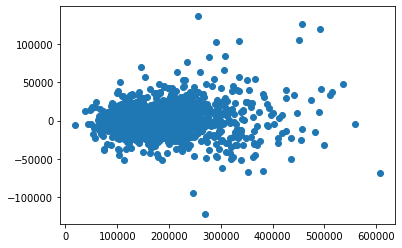

In [83]:
plt.scatter(y_train_preds, residuals);

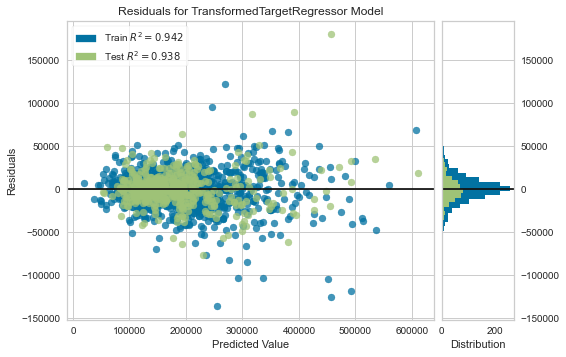

In [84]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(tt)

visualizer.fit(X_train_sc, y_train)  
visualizer.score(X_val_sc, y_val)  
visualizer.show()  ;

# https://www.scikit-yb.org/en/latest/api/regressor/residuals.html

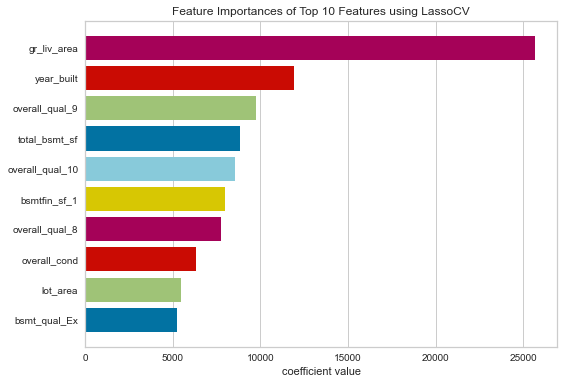

In [85]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(lasso_cv, relative=False, topn=10)
viz.fit(X_train_sc, y_train)
viz.show("feature_importance.jpg");

In [86]:
# create lists of best and worst coefficients 

# Your data
# data = np.array([-0.150896, 0.23357229, 0.00669907, 0.3730938, 0.100852, -0.85258357])
# labels = ['as','df','as','df','as','df']

# ax=pl.subplot(122)
# pl.bar(np.arange(data.size), data)
# ax.set_xticks(np.arange(data.size))
# ax.set_xticklabels(labels)

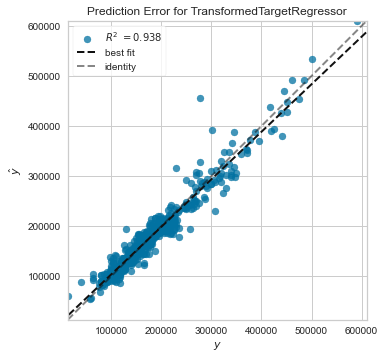

In [87]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(tt, X_train_sc, y_train, X_val_sc, y_val);

ADD ASSUMPTIONS CHECK

**APPENDIX:** 

I tried taking out the zero coefficient features and nothing changed with my model metrics  as seen below. 

In [47]:
df_new = X_train_sc[new_X_train]

In [48]:
df_new

,overall_qual_4,overall_qual_5,overall_qual_7,overall_qual_8,overall_qual_9,overall_qual_10,neighborhood_Blmngtn,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_Crawfor,neighborhood_GrnHill,neighborhood_MeadowV,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_Somerst,neighborhood_StoneBr,bldg_type_1Fam,bldg_type_TwnhsE,house_style_2.5Unf,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Mansard,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_Stone,exter_qual_Ex,exter_qual_Fa,exter_qual_TA,exter_cond_Po,foundation_CBlock,foundation_PConc,bsmt_qual_Ex,bsmt_qual_TA,bsmt_cond_Ex,bsmt_cond_Fa,kitchen_qual_Ex,kitchen_qual_Fa,kitchen_qual_TA,functional_Maj1,functional_Mod,functional_Sal,functional_Typ,garage_type_2Types,garage_type_BuiltIn,garage_finish_Fin,garage_qual_Ex,garage_qual_Fa,garage_qual_Gd,paved_drive_Y,fireplace_qu_Gd,pool_qc_Gd,pool_qc_TA,fence_GdWo,misc_feature_Othr,misc_feature_TenC,lot_frontage,lot_area,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,total_bsmt_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,fireplaces,garage_cars,garage_area,wood_deck_sf,3ssn_porch,screen_porch,yr_sold
0,-0.280449,-0.629574,1.945520,-0.372319,-0.199865,-0.102598,-0.10579,-0.19452,-0.120545,-0.190885,-0.025524,-0.099307,-0.216875,-0.154919,-0.255318,-0.302794,-0.256761,-0.141139,0.447214,-0.292425,-0.08493,-0.211891,-0.088736,0.525117,-0.062622,-0.076772,-0.652828,-0.293735,-0.198096,-0.111914,0.806126,-0.036108,1.162850,-0.890112,-0.312933,1.152073,-0.036108,-0.181528,-0.276377,-0.154919,0.985778,-0.076772,-0.125988,-0.036108,0.269492,-0.095908,-0.253868,1.747218,-0.044237,-0.206809,-0.092389,0.321634,1.696699,-0.044237,-0.036108,-0.206809,-0.044237,-0.025524,1.499720,0.531987,2.165189,-1.124198,-0.198475,-0.555218,-0.347634,-0.291180,-0.121222,-0.103165,1.581291,1.097024,-1.039912,1.284713,0.203869,-0.193684,2.258117,0.295154,0.113717,3.311222,-0.094554,-0.288676,-0.587158
1,-0.280449,1.588375,-0.514001,-0.372319,-0.199865,-0.102598,-0.10579,-0.19452,-0.120545,-0.190885,-0.025524,-0.099307,-0.216875,-0.154919,-0.255318,-0.302794,-0.256761,-0.141139,0.447214,-0.292425,-0.08493,-0.211891,-0.088736,0.525117,-0.062622,-0.076772,-0.652828,-0.293735,-0.198096,-0.111914,0.806126,-0.036108,1.162850,-0.890112,-0.312933,1.152073,-0.036108,-0.181528,-0.276377,-0.154919,-1.014427,-0.076772,-0.125988,-0.036108,0.269492,-0.095908,-0.253868,-0.572338,-0.044237,-0.206809,-0.092389,0.321634,-0.589380,-0.044237,-0.036108,-0.206809,-0.044237,-0.025524,0.062187,-0.519838,2.165189,-0.696674,0.851277,-0.555218,-0.098234,0.584287,-0.451673,-0.103165,-1.292329,1.097024,-1.039912,-0.732996,0.203869,-0.193684,-0.926885,0.295154,1.145397,0.761326,-0.094554,-0.288676,-0.587158
2,-0.280449,-0.629574,-0.514001,2.685871,-0.199865,-0.102598,-0.10579,-0.19452,-0.120545,-0.190885,-0.025524,-0.099307,-0.216875,-0.154919,3.916686,-0.302794,-0.256761,-0.141139,0.447214,-0.292425,-0.08493,-0.211891,-0.088736,0.525117,-0.062622,-0.076772,1.531798,-0.293735,-0.198096,-0.111914,-1.240501,-0.036108,-0.859956,1.123455,-0.312933,-0.868000,-0.036108,-0.181528,-0.276377,-0.154919,-1.014427,-0.076772,-0.125988,-0.036108,0.269492,-0.095908,-0.253868,-0.572338,-0.044237,-0.206809,-0.092389,0.321634,1.696699,-0.044237,-0.036108,-0.206809,-0.044237,-0.025524,0.826832,0.119061,-0.509661,1.046307,0.946709,1.190625,1.547809,2.523241,5.037097,-0.103165,0.274541,1.097024,0.789761,-0.732996,0.203869,-0.193684,0.665616,1.609229,1.888950,-0.751457,-0.094554,-0.288676,0.933710
3,-0.280449,-0.629574,-0.514001,2.685871,-0.199865,-0.102598,-0.10579,-0.19452,-0.120545,-0.190885,-0.025524,-0.099307,-0.216875,6.454972,-0.255318,-0.302794,-0.256761,-0.141139,0.447214,-0.292425,-0.08493,-0.211891,-0.088736,0.525117,-0.062622,-0.076772,1.531798,-0.293735,-0.198096,-0.111914,-1.240501,-0.036108,-0.859956,1.123455,-0.312933,-0.868000,-0.036108,-0.181528,-0.

In [49]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv = 10).fit(df_new, y_train)

print('best alpha:', lasso_cv.alpha_)
print('score:', lasso_cv.score(df_new, y_train))

best alpha: 92.56345716977143
score: 0.9307237994058908


In [26]:
lasso_cv.score(X_val_sc, y_val)

0.9344318425844886

In [50]:
from sklearn.compose import TransformedTargetRegressor

tt = TransformedTargetRegressor(regressor = lasso_cv, func = np.log, inverse_func = np.exp)

In [51]:
tt.fit(X_train_sc, y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LassoCV(cv=10))

In [52]:
tt.score(X_train_sc, y_train)

0.9424373847158217

In [53]:
tt.score(X_val_sc, y_val)

0.9376050739263987